In [23]:
import pycba as cba

In [24]:
spans = [4, 3, 9]
EI = [18e3, 120e3, 120e3]
supports = [-1, 0, 0, 0, -1, 0, -1, 0] # verti deflection, rotatin
loads = [
    [1, 1, 10, 0, 0], # beamnr, loadtype, force, start, stop
    [2, 1, 10, 0, 0],
    [3, 1, 10, 0, 0]
]
element_types = [2, 1, 1]

beam_model = cba.BeamAnalysis(spans, EI, supports, loads, element_types)
beam_model.analyze()

0

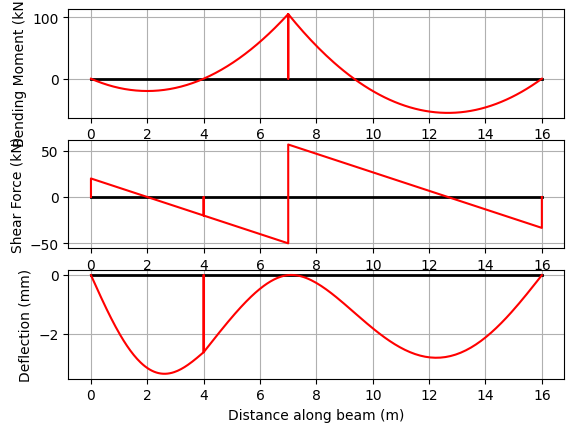

In [25]:
beam_model.plot_results()

In [26]:
# axle_spacings = [4.3, 6.5]
# axle_loads = [35, 145, 145]

axle_spacings = []
axle_loads = [35]

aashto_truck = cba.Vehicle(axle_spacings=axle_spacings,  axle_weights=axle_loads)

In [27]:
bridge_model = cba.BridgeAnalysis(beam_model, aashto_truck)

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0] ['D', 'R', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_concatenate_results', '_member_analysis', '_member_values', 'npts', 'results', 'vRes']
[<pycba.load.MemberResults object at 0x7f64d58be220>, <pycba.load.MemberResults object at 0x7f64d58be850>, <pycba.load.MemberResults object at 0x7f64d58be520>]


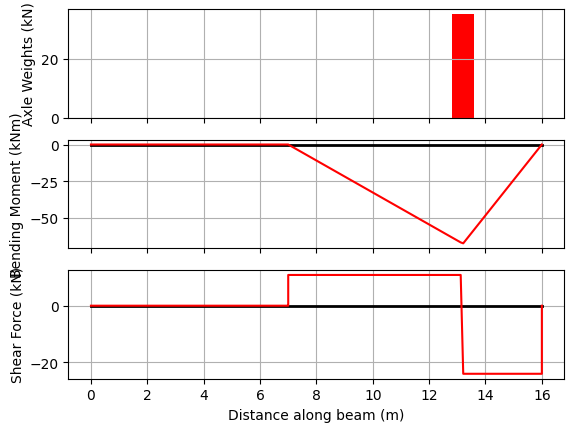

In [37]:
b = bridge_model.static_vehicle(pos=13.2, plotflag=True)
a = bridge_model.pos
print(a, dir(b))
print(b.vRes)

309 <class 'numpy.ndarray'>


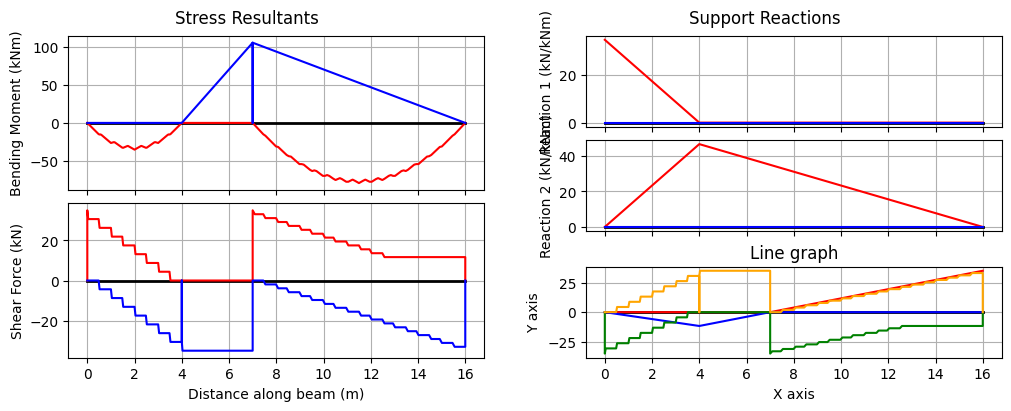

In [29]:
results_envelope = bridge_model.run_vehicle(step=0.5, plot_env=True)
Mmax = results_envelope.Mmax
Mmin = results_envelope.Mmin
Vmax = results_envelope.Vmax
Vmin = results_envelope.Vmin


pos_x = results_envelope.x

import matplotlib.pyplot as plt
print(len(Mmax), type(Mmax))


plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(pos_x, -Vmax, color ="green")
plt.plot(pos_x, -Vmin, color ="orange")
plt.show()

In [30]:
bridge_model.critical_values(results_envelope)

{'Mmax': {'val': 78.74999999999997, 'at': 11.5, 'pos': [11.5]},
 'Mmin': {'val': -104.99999999999994, 'at': 7.0, 'pos': [4.0]},
 'Vmax': {'val': 35.0, 'at': 0.0, 'pos': [0.0, 7.0]},
 'Vmin': {'val': -35.00000000000003,
  'at': 5.53,
  'pos': [4.0, 4.5, 5.0, 5.5, 6.0, 6.5]},
 'nsup': 3,
 'Rmax0': {'val': 35.0, 'pos': 0.0},
 'Rmin0': {'val': 0.0, 'pos': 0.0},
 'Rmax1': {'val': 46.66666666666674, 'pos': 4.0},
 'Rmin1': {'val': 0.0, 'pos': 0.0},
 'Rmax2': {'val': 35.0, 'pos': 16.0},
 'Rmin2': {'val': -11.666666666666652, 'pos': 4.0}}

In [31]:
# bridge_model.vResults[1].results.V
bridge_model.vResults[40].R

IndexError: list index out of range